In [1]:
# Basic set of Python Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline 
sns.set(font="DejaVu Sans", font_scale=1.8,
       rc={'figure.figsize': (10, 10),
            'lines.markersize': 15,
            "animation.embed_limit": 100})

# 马尔可夫矩阵
## 转移矩阵

In [3]:
Tmat = np.matrix([[0.610, 0.276, 0.038, 0.031, 0.036, 0.009],
        [0.170, 0.693, 0.021, 0.037, 0.026, 0.053],
        [0.042, 0.037, 0.758, 0.115, 0.030, 0.018],
        [0.032, 0.064, 0.109, 0.725, 0.050, 0.020],
        [0.031, 0.038, 0.024, 0.042, 0.798, 0.067],
        [0.003, 0.027, 0.005, 0.006, 0.025, 0.934]])

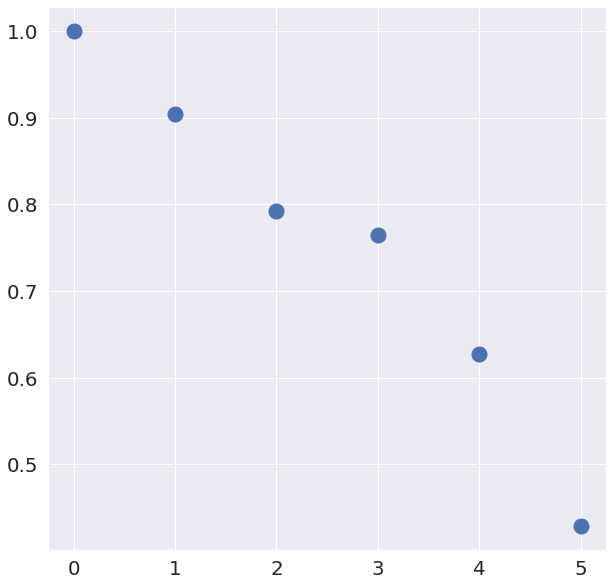

In [4]:
w,v = np.linalg.eig(Tmat)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]
plt.plot(w, "bo")

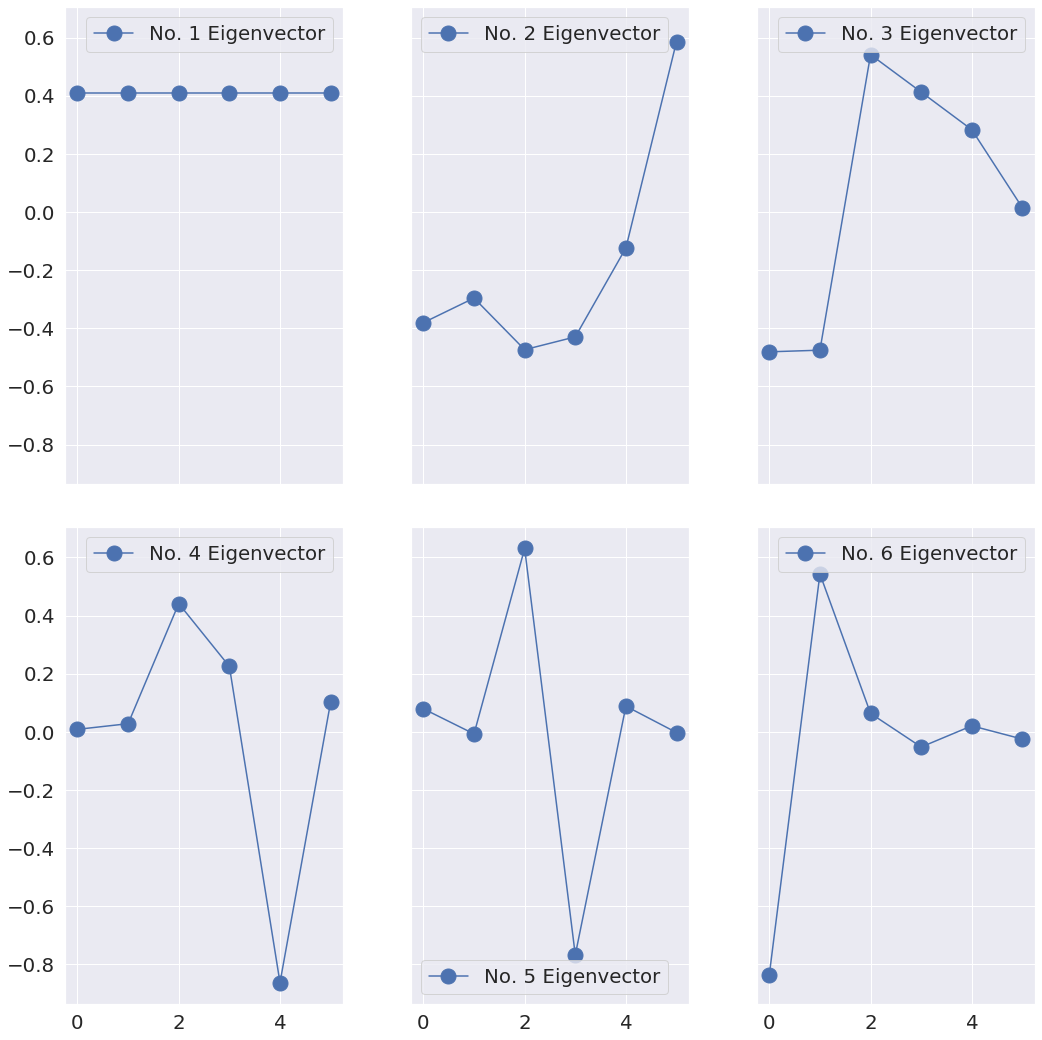

In [5]:
sel = range(0,6)
fig, axs = plt.subplots(2,3,sharex=True,sharey=True, figsize=(15,15)) 
fig.tight_layout()
for ax, key in zip(axs.reshape(6), sel): 
    ax.plot(v[:,key], "o-")
    ax.legend(labels =["No. " + str(key+1) + " Eigenvector"])

## 转移矩阵的转置

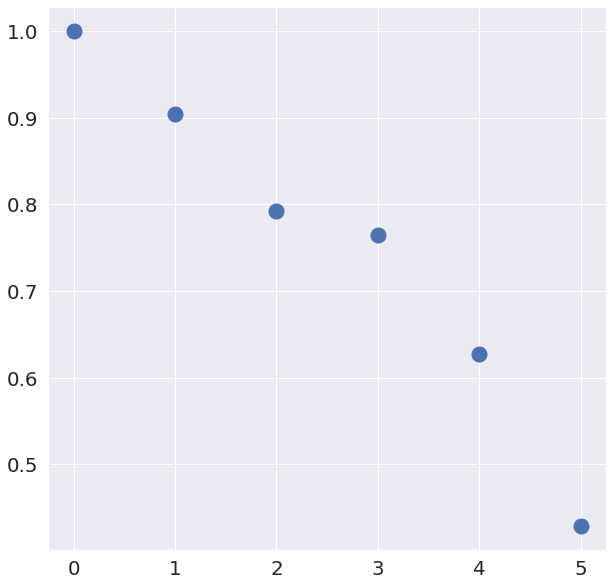

In [6]:
w,v = np.linalg.eig(Tmat.T)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]
plt.plot(w, "bo")

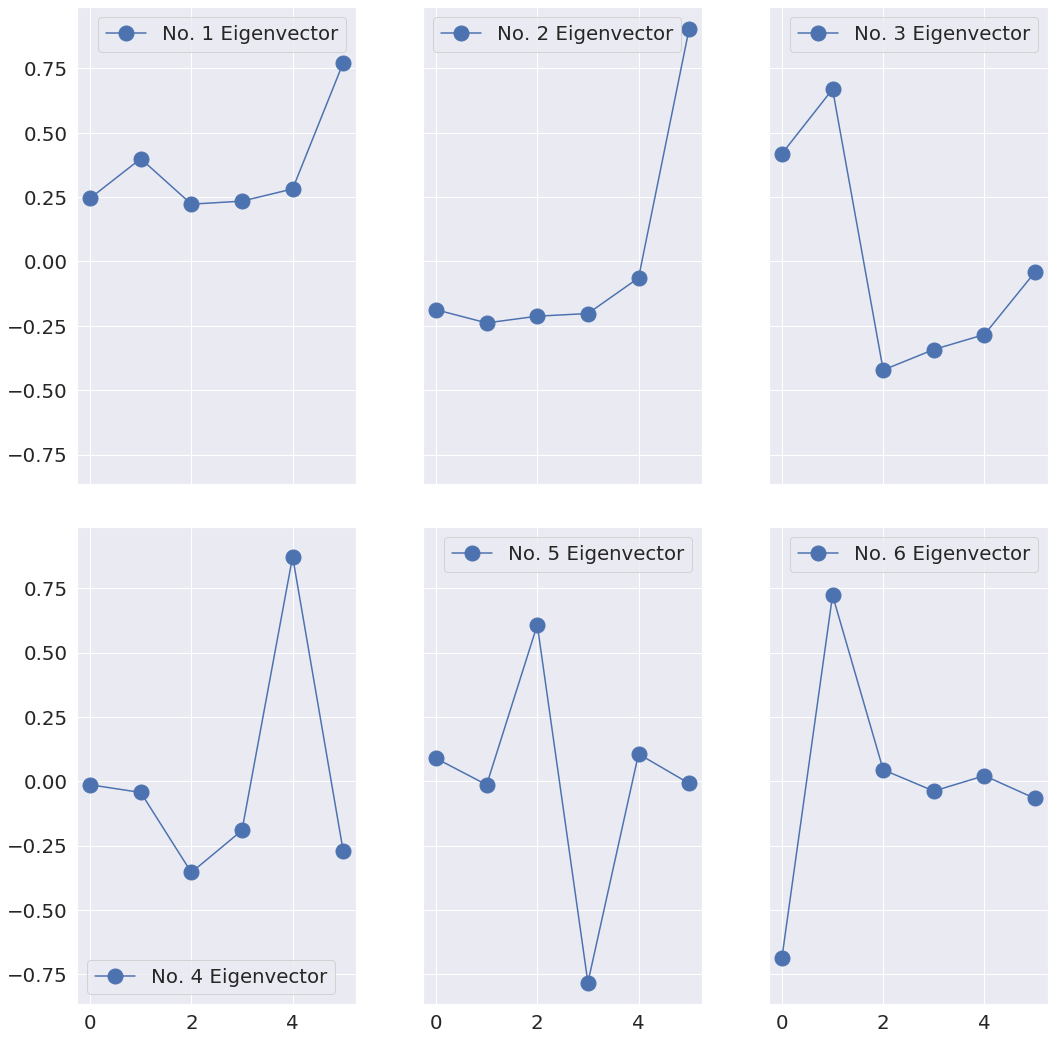

In [7]:
sel = range(0,6)
fig, axs = plt.subplots(2,3,sharex=True,sharey=True, figsize=(15,15)) 
fig.tight_layout()
for ax, key in zip(axs.reshape(6), sel): 
    ax.plot(v[:,key], "o-")
    ax.legend(labels =["No. " + str(key+1) + " Eigenvector"])

# 原始数据
## 未处理数据

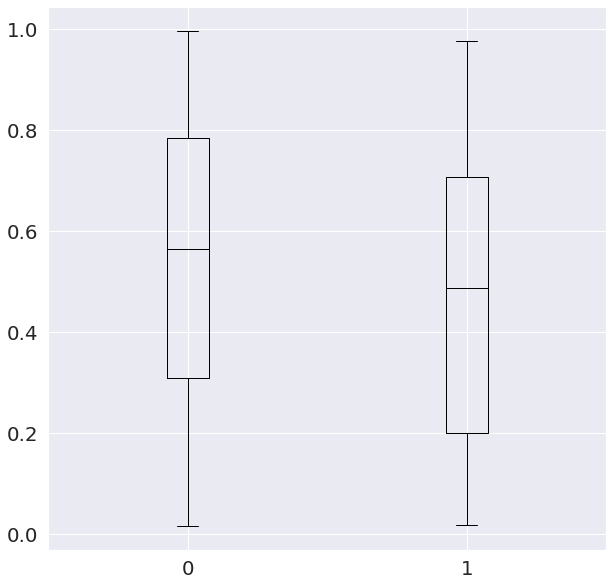

In [8]:
X = np.random.rand(50,2)
pd.DataFrame(X).boxplot(color="black")

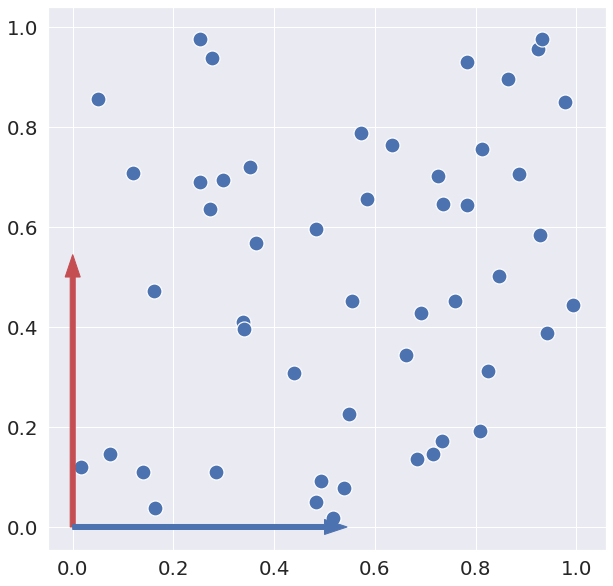

In [9]:
sns.scatterplot(x=X[:,0], y=X[:,1])
ax = [[0,0.5],[0.5,0]]
plt.arrow(0,0,ax[0][0],ax[0][1],width=0.01,color='r') 
plt.arrow(0,0,ax[1][0],ax[1][1],width=0.01,color='b') 

## 主成分分析

In [10]:
Mx = np.cov(X.transpose())
Mx

array([[0.07916452, 0.01731627],
       [0.01731627, 0.08693181]])

In [11]:
wx, vx = np.linalg.eig(Mx)
wx,vx

(array([0.06530174, 0.1007946 ]),
 array([[-0.78065383, -0.62496367],
        [ 0.62496367, -0.78065383]]))

## 投影

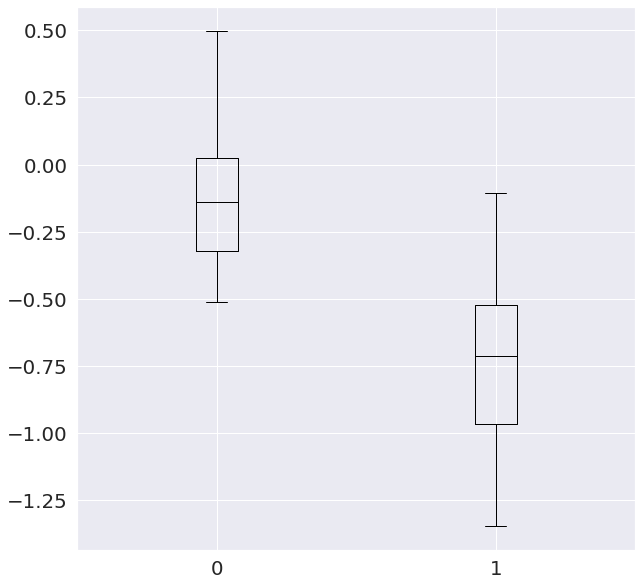

In [12]:
Xmx = np.dot(X,vx)
pd.DataFrame(Xmx).boxplot(color="black")

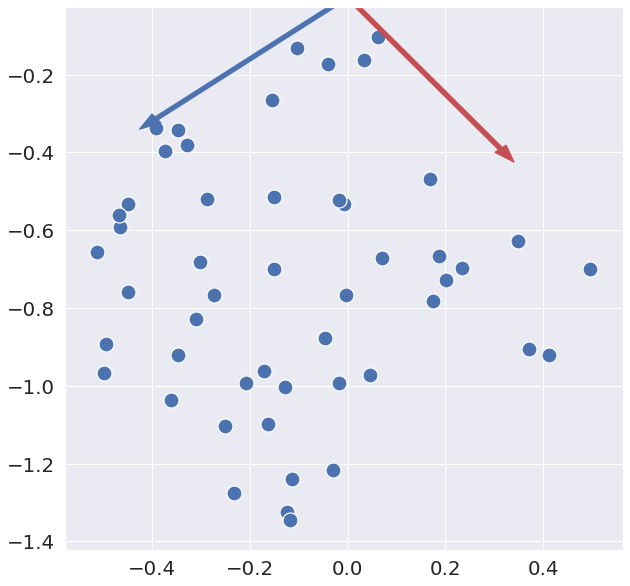

In [13]:
sns.scatterplot(x=Xmx[:,0], y=Xmx[:,1])
ax = np.dot([[0,0.5],[0.5,0]], vx)
plt.arrow(0,0,ax[0][0],ax[0][1],width=0.01,color='r') 
plt.arrow(0,0,ax[1][0],ax[1][1],width=0.01,color='b') 

# 标准化数据
## 未处理数据

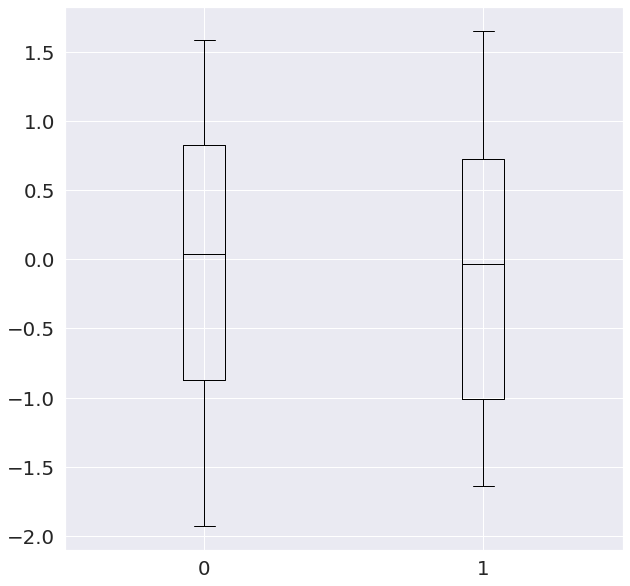

In [14]:
Y = (X - np.mean(X, axis=0))/np.std(X, axis=0)
pd.DataFrame(Y).boxplot(color="black")

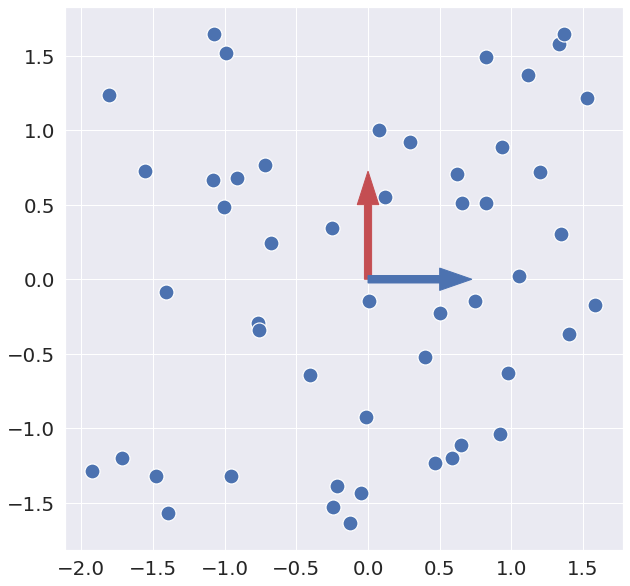

In [15]:
sns.scatterplot(x=Y[:,0], y=Y[:,1])
ax = [[0,0.5],[0.5,0]]
plt.arrow(0,0,ax[0][0],ax[0][1],width=0.05,color='r') 
plt.arrow(0,0,ax[1][0],ax[1][1],width=0.05,color='b') 

## 主成分分析

In [16]:
My = np.cov(Y.transpose())
My

array([[1.02040816, 0.21299701],
       [0.21299701, 1.02040816]])

In [17]:
wy, vy = np.linalg.eig(My)
wy,vy

(array([1.23340517, 0.80741116]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

## 投影

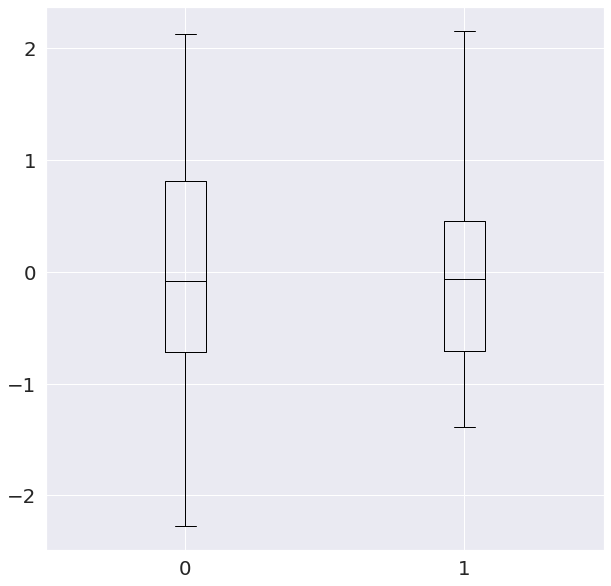

In [18]:
Ymy = np.dot(Y,vy)
pd.DataFrame(Ymy).boxplot(color="black")

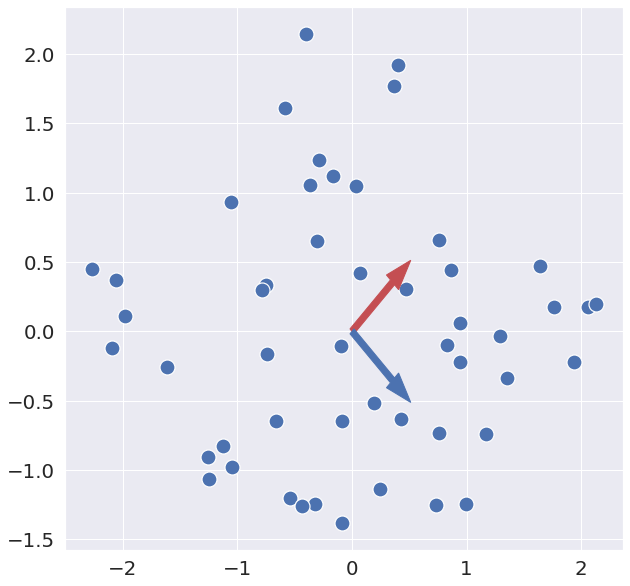

In [19]:
sns.scatterplot(x=Ymy[:,0], y=Ymy[:,1])
ax = np.dot([[0,0.5],[0.5,0]], vy)
plt.arrow(0,0,ax[0][0],ax[0][1],width=0.05,color='r') 
plt.arrow(0,0,ax[1][0],ax[1][1],width=0.05,color='b') 

# 标度数据
## 初始数据

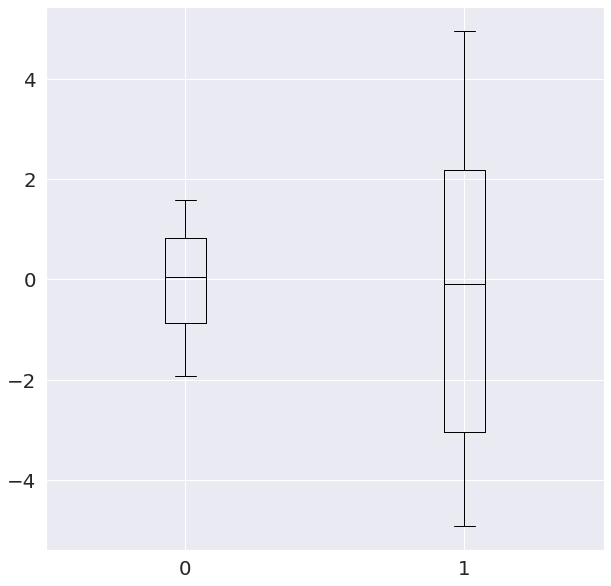

In [20]:
Z = Y*[1,3]
pd.DataFrame(Z).boxplot(color="black")

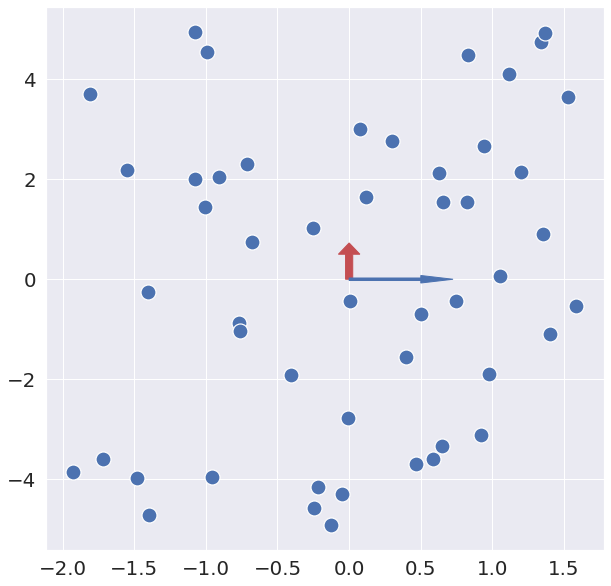

In [21]:
sns.scatterplot(x=Z[:,0], y=Z[:,1])
ax = [[0,0.5],[0.5,0]]
plt.arrow(0,0,ax[0][0],ax[0][1],width=0.05,color='r') 
plt.arrow(0,0,ax[1][0],ax[1][1],width=0.05,color='b') 

## 主成分分析

In [22]:
Mz = np.cov(Z.transpose())
Mz

array([[1.02040816, 0.63899102],
       [0.63899102, 9.18367347]])

In [23]:
wz, vz = np.linalg.eig(Mz)
wz,vz

(array([0.97069302, 9.23338861]),
 array([[-0.99698705, -0.07756816],
        [ 0.07756816, -0.99698705]]))

## 投影未标度数据

In [24]:
### rescale the data
yvz = np.sqrt(wz) * vz.transpose()
yvz = yvz.transpose()

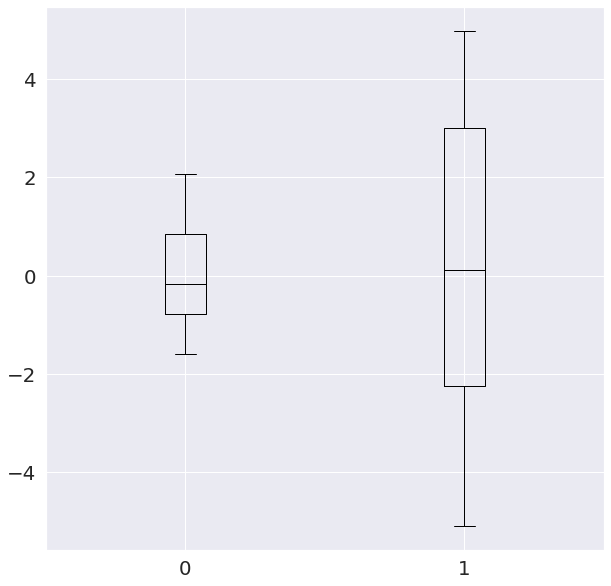

In [25]:
Ymz = np.dot(Y,yvz)
pd.DataFrame(Ymz).boxplot(color="black")

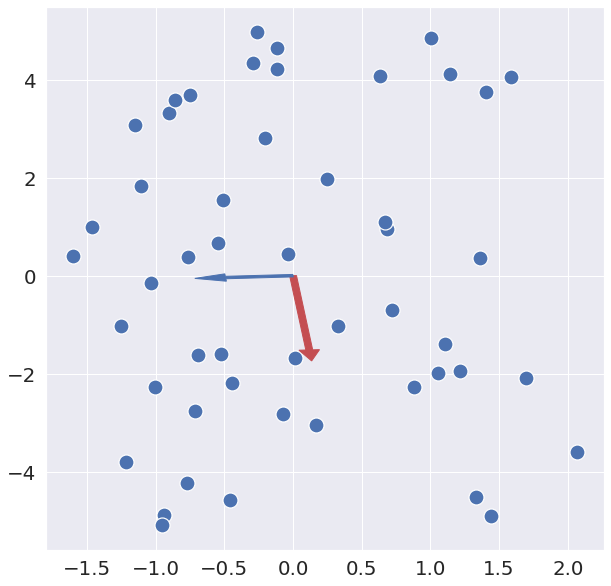

In [26]:
sns.scatterplot(x=Ymz[:,0], y=Ymz[:,1])
ax = np.dot([[0,0.5],[0.5,0]], yvz)
plt.arrow(0,0,ax[0][0],ax[0][1],width=0.05,color='r') 
plt.arrow(0,0,ax[1][0],ax[1][1],width=0.05,color='b') 

## 投影标度数据

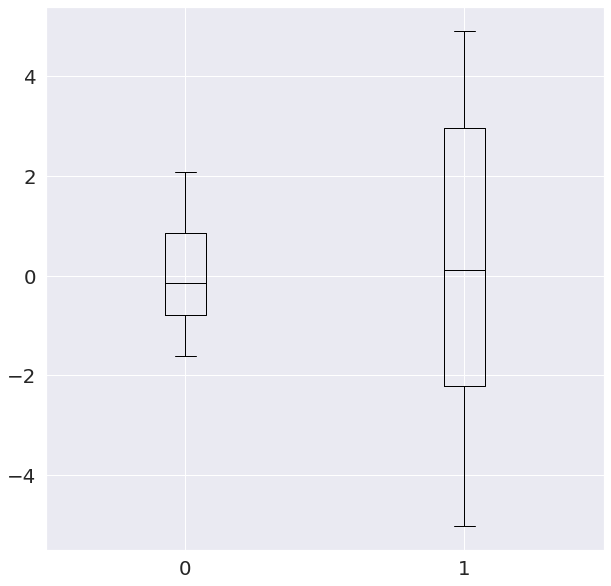

In [27]:
Zmz = np.dot(Z,vz)
pd.DataFrame(Zmz).boxplot(color="black")

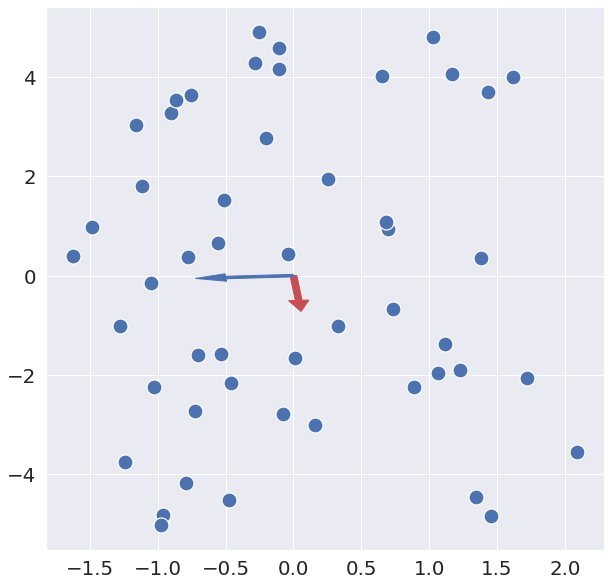

In [28]:
sns.scatterplot(x=Zmz[:,0], y=Zmz[:,1])
ax = np.dot([[0,0.5],[0.5,0]], vz)
plt.arrow(0,0,ax[0][0],ax[0][1],width=0.05,color='r') 
plt.arrow(0,0,ax[1][0],ax[1][1],width=0.05,color='b') 